In [1]:
# Data Extraction
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data PreProcessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Data Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Data Correlation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Deep Learning
# Importing the Keras libraries and package
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Credit Card Fraud Detection is very common these days, every 12 cents in 100 rupees is victim of fraudulent transaction. 

In [2]:
credit = pd.read_csv('creditcard.csv')

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to confidentiality issues actual features are not reveled, they are preprocessed and transformed as V's

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
credit['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [8]:
492/284807

0.001727485630620034

Only .17% data velues are fraudulent. 

C:\Users\vipin\Anaconda3\envs\newenvt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


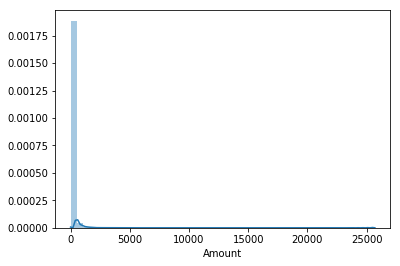

In [9]:
sns.distplot(credit['Amount'])

(array([2.6279e+05, 1.3202e+04, 4.0430e+03, 1.9670e+03, 9.6600e+02,
        5.7300e+02, 3.6400e+02, 2.6300e+02, 1.2400e+02, 1.0300e+02,
        8.5000e+01, 5.9000e+01, 4.5000e+01, 4.7000e+01, 3.8000e+01,
        3.1000e+01, 2.2000e+01, 1.1000e+01, 1.4000e+01, 8.0000e+00,
        7.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

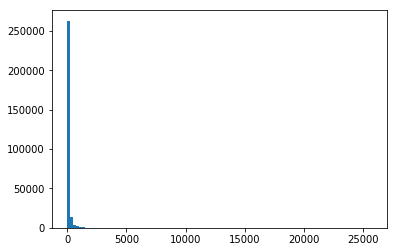

In [10]:
plt.hist(credit['Amount'],bins=100)

In [11]:
credit['Amount'].head(10)

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
5      3.67
6      4.99
7     40.80
8     93.20
9      3.68
Name: Amount, dtype: float64

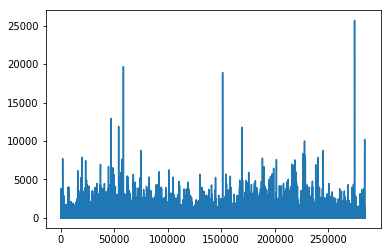

In [12]:
plt.plot(credit['Amount'])

In [13]:
credit_sub = credit.sample(frac=0.1,random_state=0)
print(credit_sub.shape)

(28481, 31)


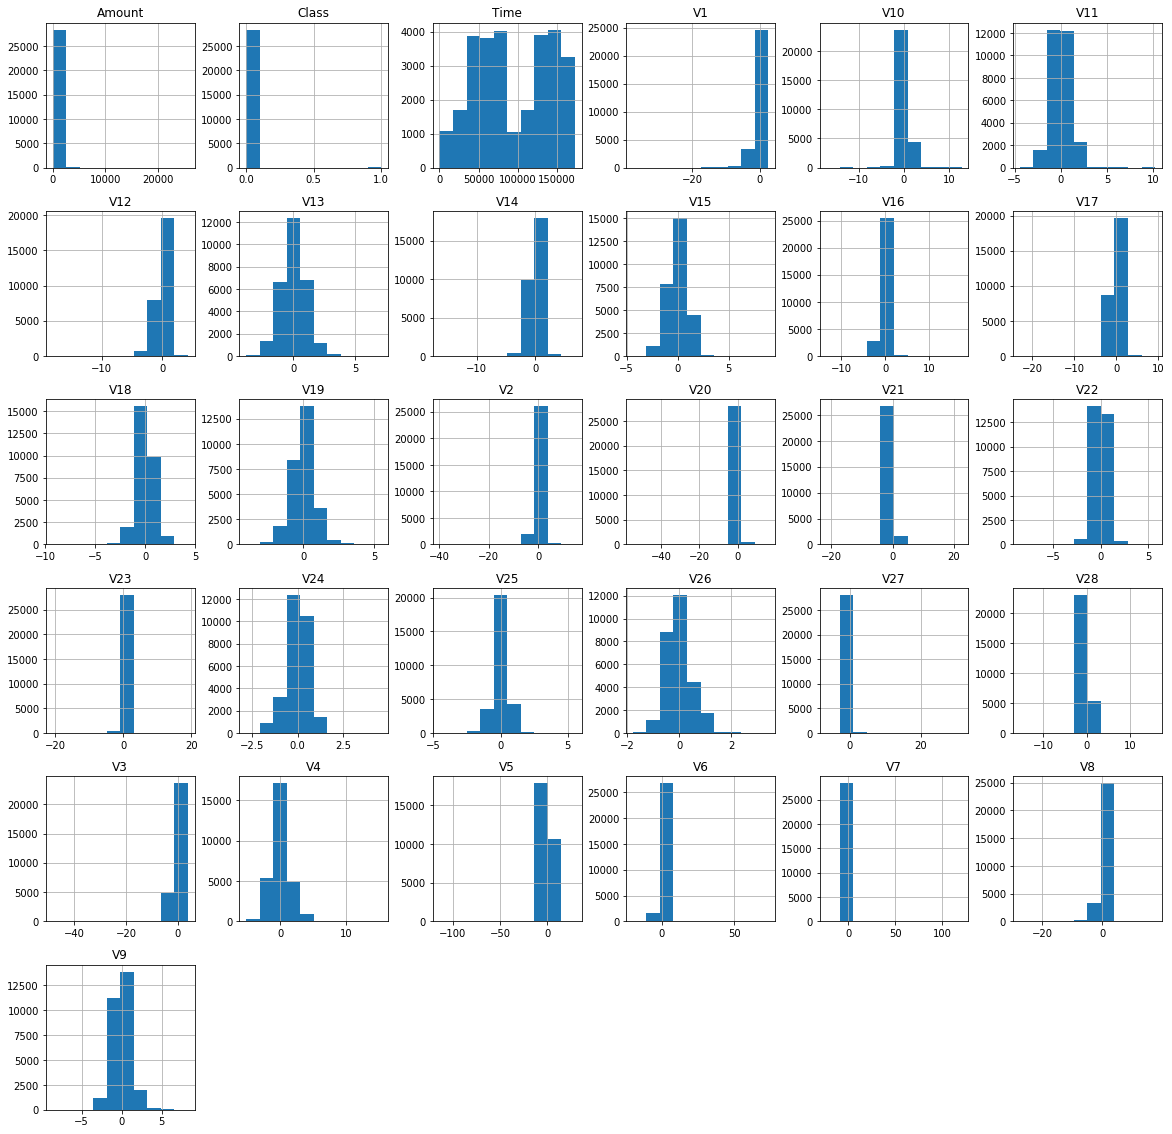

In [14]:
#Plot histogram of each parameter
credit_sub.hist(figsize=(20,20))
plt.show()

In [15]:
sns.set_style('white')

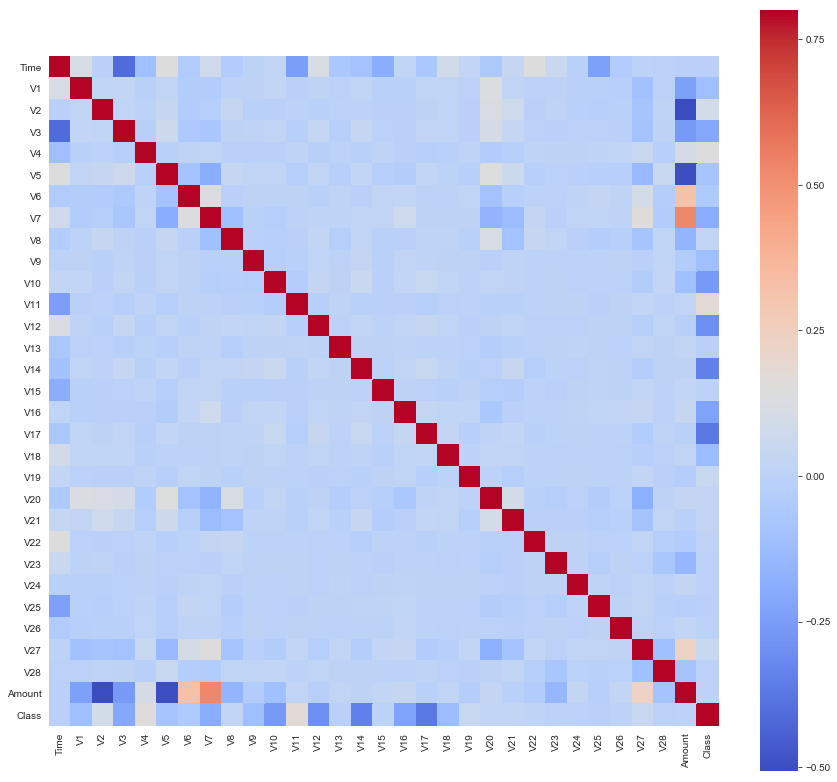

In [16]:
#Correlation Matrix
corrmat=credit_sub.corr()
fig=plt.figure(figsize=(15,14))

sns.heatmap(corrmat,vmax=0.8,square=True,cmap='coolwarm')
plt.show()

# HeatMap Observation

HeatMap Observation

Amount Correlation
From heatmap it is observed that v7 and Amount has a good correlation. v6 and v27 also show some sort of correlation with Amount.

Class Label Correlation
v10,v12,v14,v17 does not have any correlation with the class label so they can be dropped. Also v3,v16,v7 do not show any worthy correlation with class label.
v11 have best of all correlation with class label and next best with v4.

C:\Users\vipin\Anaconda3\envs\newenvt\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


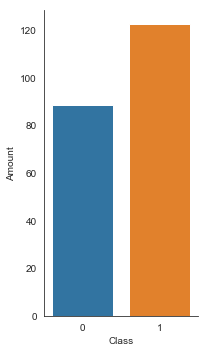

In [17]:
sns.factorplot(x="Class", y="Amount", data=credit, kind="bar", ci=None, aspect=.6)

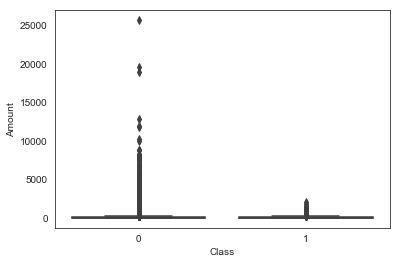

In [18]:
sns.boxplot(x='Class',y='Amount',data=credit)

In [19]:
credit['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
sum((credit['Amount']>1410) & (credit['Class']==1))

3

# Removing the outliers

In [21]:
credit_card = credit[credit['Amount']<=1410]

In [22]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283296 entries, 0 to 284806
Data columns (total 31 columns):
Time      283296 non-null float64
V1        283296 non-null float64
V2        283296 non-null float64
V3        283296 non-null float64
V4        283296 non-null float64
V5        283296 non-null float64
V6        283296 non-null float64
V7        283296 non-null float64
V8        283296 non-null float64
V9        283296 non-null float64
V10       283296 non-null float64
V11       283296 non-null float64
V12       283296 non-null float64
V13       283296 non-null float64
V14       283296 non-null float64
V15       283296 non-null float64
V16       283296 non-null float64
V17       283296 non-null float64
V18       283296 non-null float64
V19       283296 non-null float64
V20       283296 non-null float64
V21       283296 non-null float64
V22       283296 non-null float64
V23       283296 non-null float64
V24       283296 non-null float64
V25       283296 non-null float64
V26  

In [24]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,...,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000,283296.000000
mean,94827.886832,0.023119,0.038609,0.017386,-0.008396,0.024370,-0.013573,-0.026592,0.006849,0.001756,...,-0.004029,0.003587,0.004665,-0.000606,0.001753,0.000195,-0.000574,-0.000531,76.020155,0.001726
std,47491.731001,1.903305,1.503500,1.485937,1.404970,1.277602,1.289868,1.104705,1.182060,1.096084,...,0.719424,0.720042,0.525581,0.604933,0.515461,0.481368,0.385492,0.309061,150.200125,0.041511
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-23.669726,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54238.000000,-0.906935,-0.586153,-0.872502,-0.851741,-0.680411,-0.770447,-0.557166,-0.205567,-0.640257,...,-0.228679,-0.539566,-0.160090,-0.354886,-0.315626,-0.326547,-0.070028,-0.052958,5.490000,0.000000
50%,84711.500000,0.029735,0.071318,0.187697,-0.024526,-0.048803,-0.278479,0.035688,0.024204,-0.049880,...,-0.030582,0.008975,-0.010567,0.040623,0.017824,-0.051625,0.001675,0.011050,21.700000,0.000000
75%,139336.250000,1.317893,0.807592,1.031864,0.734149,0.615966,0.387978,0.561445,0.329477,0.597489,...,0.183641,0.530205,0.147505,0.438782,0.351149,0.240452,0.091018,0.076976,75.630000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,16.614054,15.661716,20.007208,15.594995,...,27.202839,10.503090,22.083545,4.022866,7.519589,3.517346,9.879903,33.847808,1410.000000,1.000000


# Correlation between V7,V6,V27 vs Amount Label

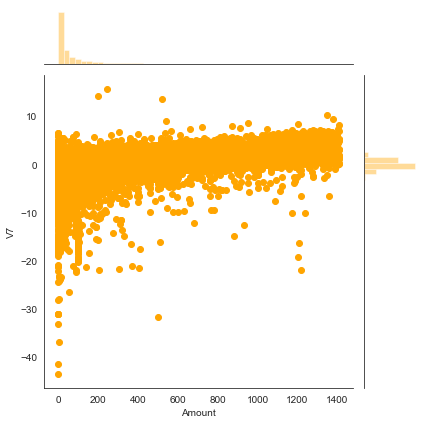

In [25]:
sns.jointplot(x='Amount',y='V7',data=credit_card,color='orange')

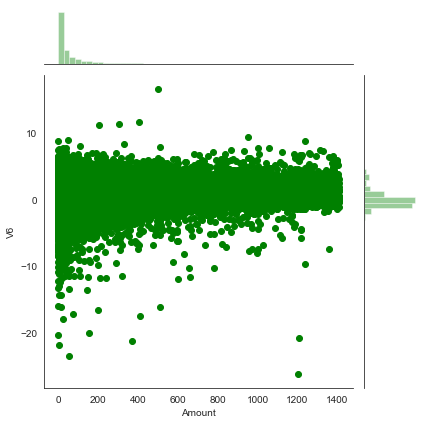

In [26]:
sns.jointplot(x='Amount',y='V6',data=credit_card,color='green')

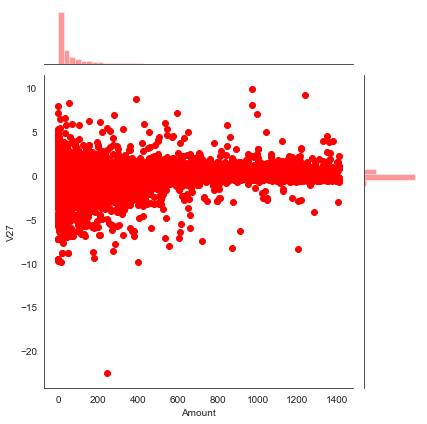

In [27]:
sns.jointplot(x='Amount',y='V27',data=credit_card,color='red')

# Removing outliers from V6,V7,V27 from Dataset

In [28]:
sum((credit_card['V7']<=-24) & (credit_card['Class']==1))

10

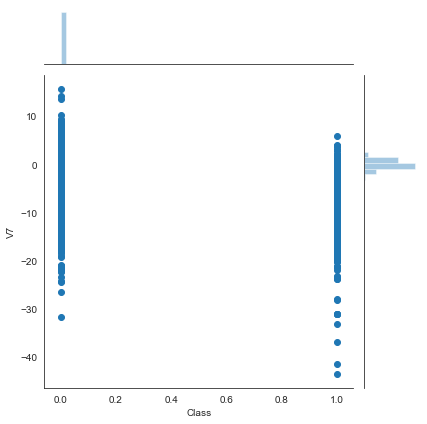

In [29]:
sns.jointplot(x='Class',y='V7',data=credit_card)

In [30]:
sum((credit_card['V6']>=7) & (credit_card['Class']==1))

0

In [31]:
credit_card = credit_card[(credit_card['V6']>=-6) & (credit_card['V6']<7)]

In [32]:
credit_card.count()

Time      283075
V1        283075
V2        283075
V3        283075
V4        283075
V5        283075
V6        283075
V7        283075
V8        283075
V9        283075
V10       283075
V11       283075
V12       283075
V13       283075
V14       283075
V15       283075
V16       283075
V17       283075
V18       283075
V19       283075
V20       283075
V21       283075
V22       283075
V23       283075
V24       283075
V25       283075
V26       283075
V27       283075
V28       283075
Amount    283075
Class     283075
dtype: int64

In [33]:
sum((credit_card['V27']>=3) & (credit_card['Class']==1))

1

In [34]:
credit_card = credit_card[(credit_card['V27']>-9) & (credit_card['V27']<4)]

In [35]:
credit_card.count()

Time      283024
V1        283024
V2        283024
V3        283024
V4        283024
V5        283024
V6        283024
V7        283024
V8        283024
V9        283024
V10       283024
V11       283024
V12       283024
V13       283024
V14       283024
V15       283024
V16       283024
V17       283024
V18       283024
V19       283024
V20       283024
V21       283024
V22       283024
V23       283024
V24       283024
V25       283024
V26       283024
V27       283024
V28       283024
Amount    283024
Class     283024
dtype: int64

In [36]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Correlation between v11 and v4 vs Class label

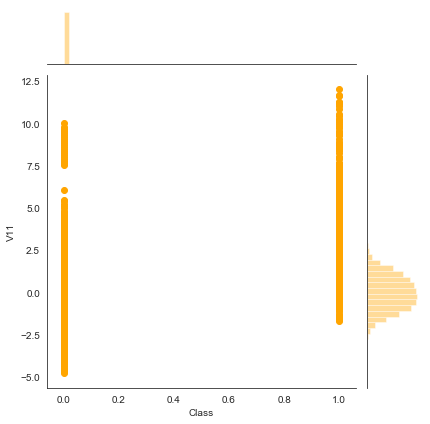

In [37]:
sns.jointplot(x='Class',y='V11',data=credit_card,color ='orange')

In [38]:
sum((credit_card['V11']<=-1.6) & (credit_card['Class']==1))

1

In [39]:
credit_card = credit_card[credit_card['V11']>-1.6]

In [40]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,...,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000,269910.000000
mean,93949.353373,0.066234,0.046472,0.020065,-0.027781,0.032699,-0.015934,-0.003164,-0.001510,-0.003048,...,-0.002118,0.002387,0.005262,0.017060,0.000767,-0.001635,-0.000909,0.000859,75.404084,0.001804
std,47467.004057,1.807259,1.383798,1.460551,1.375649,1.203773,1.273525,1.046247,1.098218,1.094522,...,0.688640,0.715384,0.482057,0.599260,0.508759,0.478967,0.365996,0.281565,149.612584,0.042439
min,0.000000,-46.855047,-45.607973,-33.680984,-5.683171,-23.669726,-5.984228,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-27.533643,-2.836627,-4.930750,-1.855355,-8.878665,-6.621377,0.000000,0.000000
25%,53641.250000,-0.883000,-0.578678,-0.874659,-0.851718,-0.668065,-0.780895,-0.540402,-0.209788,-0.641562,...,-0.228278,-0.540520,-0.155976,-0.333550,-0.315093,-0.327180,-0.069745,-0.052579,5.360000,0.000000
50%,83533.000000,0.058890,0.071299,0.186718,-0.030473,-0.042361,-0.295698,0.045443,0.017347,-0.054820,...,-0.031422,0.006386,-0.008695,0.049751,0.017155,-0.052422,0.000882,0.011138,21.000000,0.000000
75%,138621.000000,1.321015,0.801757,1.027694,0.710733,0.620137,0.360166,0.566732,0.317626,0.587854,...,0.183245,0.527105,0.147718,0.448708,0.348233,0.236343,0.088638,0.075917,75.000000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,13.129143,15.943910,6.952718,14.203189,20.007208,10.392889,...,27.202839,8.361985,15.879421,4.022866,7.519589,3.517346,3.989217,22.620072,1410.000000,1.000000


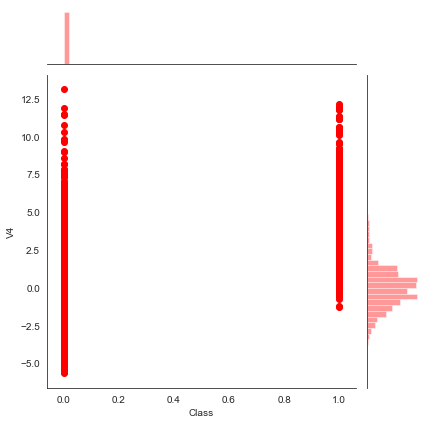

In [41]:
sns.jointplot(x='Class',y='V4',data=credit_card,color ='red')

In [42]:
sum((credit_card['V4']<=-0.6) & (credit_card['Class']==0))

90502

In [43]:
credit_card = credit_card[credit_card['V4']>-0.6]

In [44]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179405 entries, 0 to 284806
Data columns (total 31 columns):
Time      179405 non-null float64
V1        179405 non-null float64
V2        179405 non-null float64
V3        179405 non-null float64
V4        179405 non-null float64
V5        179405 non-null float64
V6        179405 non-null float64
V7        179405 non-null float64
V8        179405 non-null float64
V9        179405 non-null float64
V10       179405 non-null float64
V11       179405 non-null float64
V12       179405 non-null float64
V13       179405 non-null float64
V14       179405 non-null float64
V15       179405 non-null float64
V16       179405 non-null float64
V17       179405 non-null float64
V18       179405 non-null float64
V19       179405 non-null float64
V20       179405 non-null float64
V21       179405 non-null float64
V22       179405 non-null float64
V23       179405 non-null float64
V24       179405 non-null float64
V25       179405 non-null float64
V26  

# Uncorrelation between V10,V12,V14,V17 vs Class Label

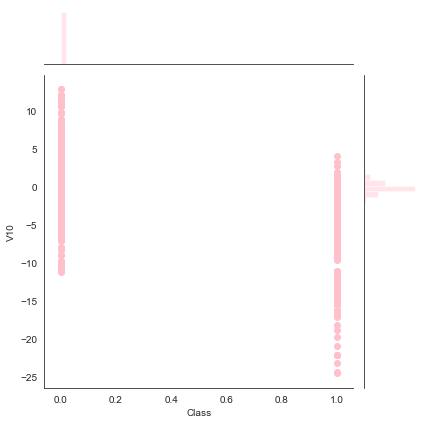

In [45]:
sns.jointplot(x='Class',y='V10',data=credit_card,color ='pink')

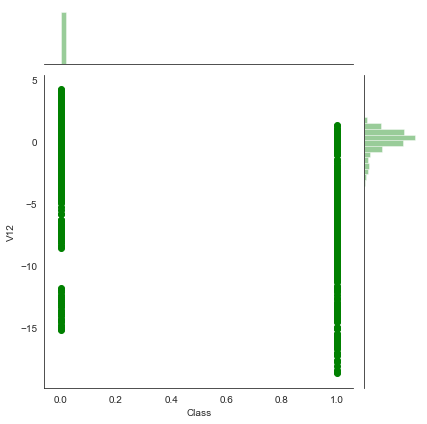

In [46]:
sns.jointplot(x='Class',y='V12',data=credit_card,color='green')

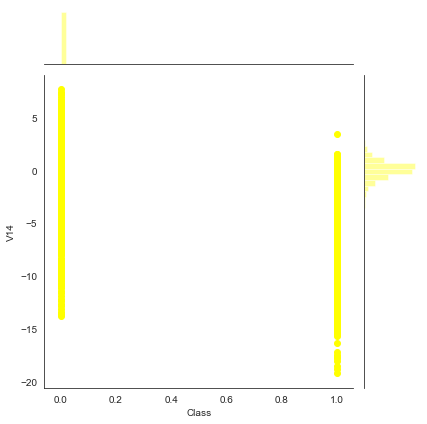

In [47]:
sns.jointplot(x='Class',y='V14',data=credit_card,color='yellow')

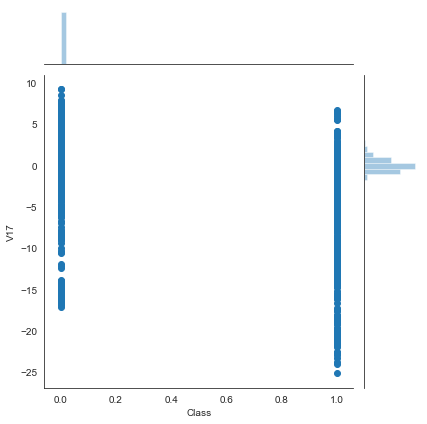

In [48]:
sns.jointplot(x='Class',y='V17',data=credit_card)

In [49]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [50]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,...,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000,179405.000000
mean,90234.332455,0.207473,0.130739,0.039393,0.677448,0.050515,-0.078247,0.043572,-0.008597,0.095626,...,-0.013852,-0.025969,0.012421,0.018115,0.003275,0.008900,-0.008061,0.000755,76.258597,0.002698
std,47139.514445,1.811005,1.356977,1.508341,1.051229,1.144831,1.166771,1.034371,1.074433,0.920217,...,0.653869,0.685129,0.515877,0.577520,0.496779,0.481548,0.341470,0.284976,156.875451,0.051870
min,0.000000,-46.855047,-45.607973,-33.680984,-0.599995,-23.669726,-5.984228,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-27.533643,-2.836627,-4.930750,-1.664130,-8.878665,-6.621377,0.000000,0.000000
25%,51432.000000,-0.748663,-0.339438,-0.885758,-0.025221,-0.547062,-0.776751,-0.413311,-0.207990,-0.464877,...,-0.227694,-0.555708,-0.143349,-0.309454,-0.298906,-0.328314,-0.070520,-0.048995,4.490000,0.000000
50%,79063.000000,0.808507,0.146400,0.243479,0.447201,-0.010906,-0.285876,0.086718,0.008860,0.035094,...,-0.032324,-0.011891,-0.005824,0.050738,0.032273,-0.021121,-0.007876,0.010292,19.370000,0.000000
75%,135131.000000,1.334786,0.848774,1.074446,1.108506,0.553351,0.341337,0.552436,0.283726,0.620425,...,0.167583,0.473607,0.151292,0.425696,0.343331,0.252289,0.071641,0.065276,72.790000,0.000000
max,172792.000000,2.270235,22.057729,4.187811,13.129143,15.943910,6.920591,14.203189,20.007208,8.939793,...,27.202839,8.361985,15.879421,4.022866,7.519589,3.517346,3.989217,22.620072,1409.900000,1.000000


In [51]:
credit_card = credit_card.drop(['Time'],axis=1)

In [52]:
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [53]:
sc = StandardScaler()

In [54]:
scaled_data = pd.DataFrame(credit_card['Amount'])

In [55]:
scaled_data = sc.fit_transform(scaled_data)

In [56]:
scaled_data.min()

-0.48611053848990005

In [57]:
credit_card['Amount'] = scaled_data

In [58]:
X = credit_card.iloc[:,:-1]

In [59]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.467642
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.468963
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.927658
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.039959
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.462716


In [60]:
y = credit_card.iloc[:,-1]

In [61]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Class, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [63]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)

In [66]:
print(cm)

[[35783     4]
 [   12    82]]


In [67]:
true_pos = cm[1][1]
false_pos = cm[1][0]
false_neg = cm[0][1]
precision = (true_pos /(true_pos+false_pos))
recall = (true_pos /(true_pos + false_neg))
f1_score = 2*(precision*recall)/(precision+recall)

In [68]:
f1_score

0.9111111111111112

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35787
           1       0.95      0.87      0.91        94

   micro avg       1.00      1.00      1.00     35881
   macro avg       0.98      0.94      0.96     35881
weighted avg       1.00      1.00      1.00     35881



In [70]:
credit_card['Class'].value_counts()

0    178921
1       484
Name: Class, dtype: int64